In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

path = "../data/raw/houses_moreinfo.csv"

df = pd.read_csv(path)

In [4]:
df.head()

,id,city,postal_code,district,province,price,type_sale,subtype,sale_type,state_construction,...,swimmingpool,has_balcony,has_terrace,has_attic,has_basement,construction_year,epc,heating,life_annuity,area_total
0,1882546,Wenduine ...,8420,Oostend,West Flanders,163000,HOUSE,CHALET,FOR_SALE,AS_NEW,...,0,,,,,2023,,GAS,0,155
1,2784938,Heist-aan-Zee ...,8301,Brugge,West Flanders,108000,HOUSE,BUNGALOW,FOR_SALE,AS_NEW,...,0,,,,,2023,,GAS,0,170
2,4679861,Oostende ...,8400,Oostend,West Flanders,330000,HOUSE,HOUSE,FOR_SALE,GOOD,...,0,,1,,,,B,,0,65
3,5650273,Dilsen-Stokkem ...,3650,Maaseik,Limburg,535000,HOUSE,APARTMENT_BLOCK,FOR_SALE,,...,0,,,,,1988,B,GAS,0,0
4,6349237,Corswarem ...,4257,Waremme,Liège,,HOUSE_GROUP,HOUSE_GROUP,FOR_SALE,,...,0,,,,,,,,0,


In [ ]:
# Assuming 'price' column contains strings initially, strip leading and trailing whitespaces
# Only apply .str.strip() if 'price' column is of string type
if df['price'].dtype == 'object':
    df['price'] = df['price'].str.strip()

# Convert 'price' column to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with missing 'price' values
df.dropna(subset=['price'], inplace=True)

# Drop rows where 'life_annuity' column equals 1
df = df[df['life_annuity'] != 1]

# Drop rows where 'subtype' column equals 'APARTMENT_BLOCK'
df = df[df['subtype'] != 'APARTMENT_BLOCK']

# Drop specified columns
df.drop(['type_sale', 'sale_type', 'has_balcony',
        'life_annuity'], axis=1, inplace=True)

# Now 'price' column is numeric and cleaned


# df_cleaned.to_csv("houses_cleaned.csv", index=False)

In [ ]:
subtypes_to_drop = ['mixed_use_building',
                    'other_property', 'castle', 'apartment_group', 'apartment_block']

# Remove leading and trailing whitespaces (if any)
df['subtype'] = df['subtype'].str.strip()

# Convert 'subtype' column to lowercase
df['subtype'] = df['subtype'].str.lower()

# Now, drop rows where 'subtype' is in the list of subtypes to drop
indices_to_drop = df[df['subtype'].isin(subtypes_to_drop)].index
df.drop(indices_to_drop, inplace=True)

# Check the value counts again
print(df.subtype.value_counts())

In [ ]:
df.shape

In [ ]:
# Trim leading and trailing white spaces from all string columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Replace empty strings with NaN
df.replace('', np.nan, inplace=True)

# Calculate the proportion of missing values per column
missing_values = df.isnull().mean() * 100

# Display the proportion of missing values per column
print("Proportion of missing values per column:")
print(missing_values)

In [2]:
path = "../data/cleaned/Cleaned_2.csv"

df = pd.read_csv(path)

In [3]:
df.head()

,id,city,postal_code,district,province,price,subtype,state_construction,living_area,terrace_area,...,has_garden,kitchen,fireplace,swimmingpool,has_terrace,has_attic,has_basement,construction_year,epc,area_total
0,1882546,wenduine,8420,oostend,west flanders,163000.0,CHALET,AS_NEW,62.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2023.0,NaN,155.0
1,2784938,heist-aan-zee,8301,brugge,west flanders,108000.0,BUNGALOW,AS_NEW,51.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2023.0,NaN,170.0
2,6675519,zonhoven,3520,hasselt,limburg,392422.0,HOUSE,NaN,206.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2023.0,NaN,370.0
3,7066131,bredene,8450,oostend,west flanders,245000.0,HOUSE,AS_NEW,76.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2023.0,B,150.0
4,7222190,geel,2440,turnhout,antwerp,335527.0,HOUSE,NaN,160.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431.0


In [4]:

fig = px.box(df, y='province', x='price', orientation='h',
             log_x=True, title='Price Range by Province')

# Customize the layout
fig.update_layout(yaxis_title='Province',
                  xaxis_title='Price (Log Scale)', xaxis_type='log')

# Show the plot
fig.show()

In [5]:
df.shape

(30554, 27)

In [6]:
subset = df[(df['price'] >= 150000) & (df['price'] <= 2000000)]
subset.shape

(28094, 27)

In [7]:

fig = px.box(subset, y='province', x='price', orientation='h',
             log_x=True, title='Price Range by Province')

# Customize the layout
fig.update_layout(yaxis_title='Province',
                  xaxis_title='Price (Log Scale)', xaxis_type='log')

# Show the plot
fig.show()

In [29]:
def IQR(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    # quartiles = df[column].quantile([0.25, 0.75])
    iqr = Q3 - Q1
    lowerlimit = Q1 - 1.5*iqr
    upperlimit = Q3 + 1.5*iqr

    return lowerlimit, upperlimit

In [20]:
lower_limit, upper_limit = IQR(subset['price'])

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)


Lower Limit: -59500.0
Upper Limit: 832500.0


In [24]:

def mad(data):
    median = np.median(data)
    deviations = np.abs(data - median)
    mad_value = np.median(deviations)
    return mad_value


# Assuming 'df' is your DataFrame containing numerical data
# Extract the column or subset of data you want to calculate MAD for
data_column = df['price']  # Example: 'price' column from your DataFrame

# Calculate MAD
mad_result = mad(data_column)

print("Median Absolute Deviation (MAD):", mad_result)

Median Absolute Deviation (MAD): 125000.0


In [8]:
# Create the violin plot
fig = px.violin(subset, y='province', x='price', box=True,
                points="all", title='Price Distribution by Province')

# Customize the layout
fig.update_layout(yaxis_title='Province', xaxis_title='Price')

# Show the plot
fig.show()

In [9]:
subset_min = df[df['price'] < 100000]

# Select specific columns for the subset
subset_min = subset_min[['subtype', 'construction_year', 'epc', 'state_construction']]

In [10]:
subset_min.shape

(634, 4)

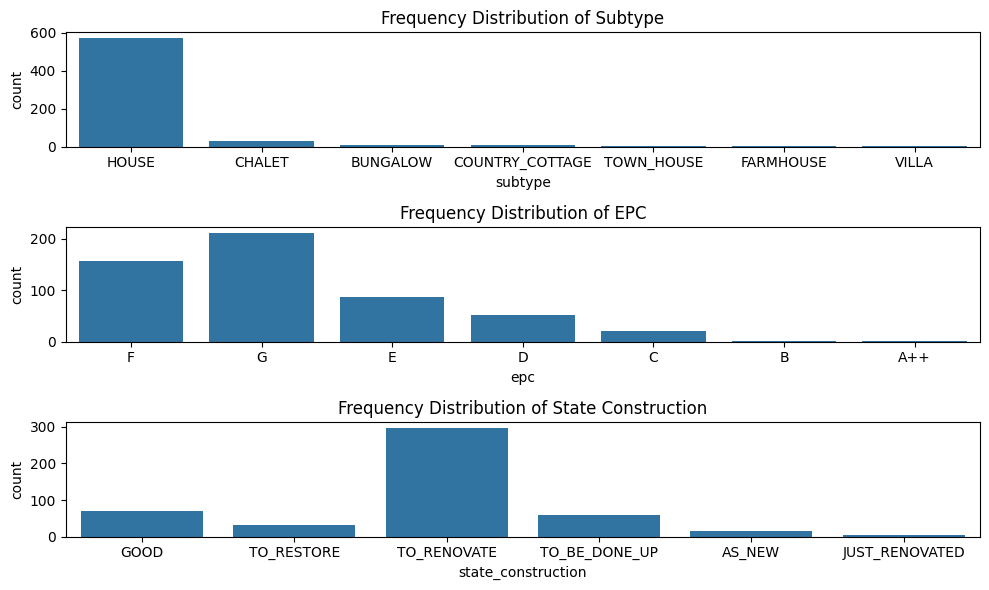

Frequency Distribution of Subtype:
subtype
HOUSE              90.536278
CHALET              5.047319
BUNGALOW            1.419558
COUNTRY_COTTAGE     1.419558
FARMHOUSE           0.788644
VILLA               0.473186
TOWN_HOUSE          0.315457
Name: proportion, dtype: float64

Frequency Distribution of EPC:
epc
G      39.849624
F      29.511278
E      16.353383
D       9.774436
C       3.947368
B       0.375940
A++     0.187970
Name: proportion, dtype: float64

Frequency Distribution of State Construction:
state_construction
TO_RENOVATE       62.083333
GOOD              14.583333
TO_BE_DONE_UP     12.500000
TO_RESTORE         6.458333
AS_NEW             3.333333
JUST_RENOVATED     1.041667
Name: proportion, dtype: float64


In [41]:

# Set up the plotting area
plt.figure(figsize=(10, 6))

# Plot the frequency distribution of 'subtype'
plt.subplot(3, 1, 1)
sns.countplot(data=subset_min, x='subtype')
plt.title('Frequency Distribution of Subtype')

# Plot the frequency distribution of 'epc'
plt.subplot(3, 1, 2)
sns.countplot(data=subset_min, x='epc')
plt.title('Frequency Distribution of EPC')

# Plot the frequency distribution of 'state_construction'
plt.subplot(3, 1, 3)
sns.countplot(data=subset_min, x='state_construction')
plt.title('Frequency Distribution of State Construction')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# Alternatively, you can also print the counts and percentages
print("Frequency Distribution of Subtype:")
print(subset_min['subtype'].value_counts(normalize=True) * 100)
print("\nFrequency Distribution of EPC:")
print(subset_min['epc'].value_counts(normalize=True) * 100)
print("\nFrequency Distribution of State Construction:")
print(subset_min['state_construction'].value_counts(normalize=True) * 100)

In [52]:
subset_max = df[df['price'] > 1000000]

# Select specific columns for the subset
subset_max = subset_max[['subtype',
                         'construction_year', 'epc', 'state_construction']]

In [53]:
subset_max.shape

(1610, 4)

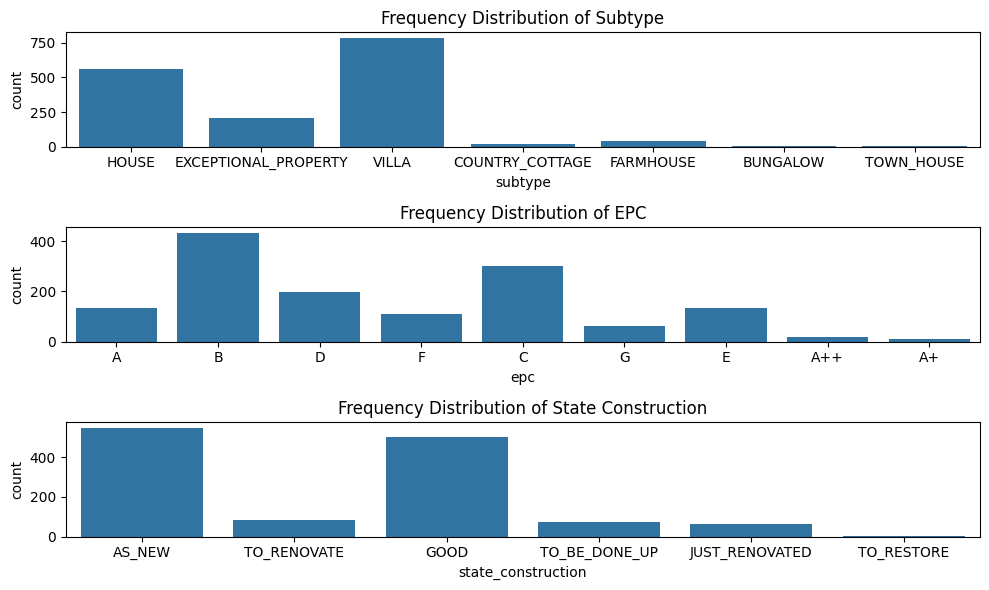

Frequency Distribution of Subtype:
subtype
VILLA                   48.819876
HOUSE                   34.720497
EXCEPTIONAL_PROPERTY    12.670807
FARMHOUSE                2.484472
COUNTRY_COTTAGE          1.055901
BUNGALOW                 0.124224
TOWN_HOUSE               0.124224
Name: proportion, dtype: float64

Frequency Distribution of EPC:
epc
B      30.911681
C      21.438746
D      13.960114
A       9.686610
E       9.686610
F       7.905983
G       4.344729
A++     1.424501
A+      0.641026
Name: proportion, dtype: float64

Frequency Distribution of State Construction:
state_construction
AS_NEW            42.857143
GOOD              39.188134
TO_RENOVATE        6.557377
TO_BE_DONE_UP      5.932865
JUST_RENOVATED     5.074161
TO_RESTORE         0.390320
Name: proportion, dtype: float64


In [54]:
# Set up the plotting area
plt.figure(figsize=(10, 6))

# Plot the frequency distribution of 'subtype'
plt.subplot(3, 1, 1)
sns.countplot(data=subset_max, x='subtype')
plt.title('Frequency Distribution of Subtype')

# Plot the frequency distribution of 'epc'
plt.subplot(3, 1, 2)
sns.countplot(data=subset_max, x='epc')
plt.title('Frequency Distribution of EPC')

# Plot the frequency distribution of 'state_construction'
plt.subplot(3, 1, 3)
sns.countplot(data=subset_max, x='state_construction')
plt.title('Frequency Distribution of State Construction')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# Alternatively, you can also print the counts and percentages
print("Frequency Distribution of Subtype:")
print(subset_max['subtype'].value_counts(normalize=True) * 100)
print("\nFrequency Distribution of EPC:")
print(subset_max['epc'].value_counts(normalize=True) * 100)
print("\nFrequency Distribution of State Construction:")
print(subset_max['state_construction'].value_counts(normalize=True) * 100)

In [ ]:
def categorize_by_bedrooms(n):
    if n == 1:
        return '1 bedroom'
    elif n == 2:
        return '2 bedrooms'
    elif n == 3:
        return '3 bedrooms'
    else:
        return 'More than 3 bedrooms'


# Apply the categorization function to the 'bedrooms' column
df['category'] = df['bedrooms'].apply(categorize_by_bedrooms)


In [18]:


# Assuming 'df' is your DataFrame and contains a column named 'area_total'

# Extend bins for total area ranges to include >500
area_bins = [0, 100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000, 3000, 
             float('inf')]  # 'float('inf')' to include everything above 500
area_labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-800', '801-1000',
               '1001-1500', '1501-2000', '2001-3000', '>3000']

# Categorize total area into defined bins
df['area_category'] = pd.cut(
    df['area_total'], bins=area_bins, labels=area_labels, include_lowest=True)

# Count the number of properties in each area category
area_counts = df['area_category'].value_counts().sort_index().reset_index()
area_counts.columns = ['Area Range', 'Number of Properties']

# Plotting with Plotly Express
fig = px.bar(area_counts, x='Area Range', y='Number of Properties',
             title='Number of Properties by Total Area Range',
             labels={
                 'Area Range': 'Total Area Range (sqm)', 'Number of Properties': 'Number of Properties'},
             color='Number of Properties',
             text='Number of Properties')

fig.update_layout(xaxis_tickangle=-45, xaxis_title='Total Area Range (sqm)',
                  yaxis_title='Number of Properties')
fig.show()

In [20]:


# Assuming 'df' is your DataFrame and it includes 'area_total' and 'price' columns

# Categorize total area into defined bins
df['area_category'] = pd.cut(
    df['area_total'], bins=area_bins, labels=area_labels, include_lowest=True)

# Aggregate to get count and average price by area category
area_agg = df.groupby('area_category').agg(
    Number_of_Properties=('id', 'count'),
    Average_Price=('price', 'mean')
).reset_index()

# Create a subplot with 2 y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add the Number of Properties as a bar chart on the primary y-axis
fig.add_trace(
    go.Bar(x=area_agg['area_category'], y=area_agg['Number_of_Properties'],
           name='Number of Properties', marker_color='skyblue'),
    secondary_y=False,
)

# Add the Average Price as a line chart on the secondary y-axis
fig.add_trace(
    go.Scatter(x=area_agg['area_category'], y=area_agg['Average_Price'],
               name='Average Price', mode='lines+markers', marker_color='green'),
    secondary_y=True,
)

# Add titles and labels
fig.update_layout(
    title_text='Number of Properties and Average Price by Total Area Range',
    xaxis_title='Total Area Range (sqm)',
    xaxis_tickangle=-45
)

# Set y-axes titles
fig.update_yaxes(title_text="<b>Number of Properties</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Average Price</b> (EUR)", secondary_y=True)

fig.show()

C:\Users\ygale\AppData\Local\Temp\ipykernel_20904\1249907102.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [29]:

# Assuming 'df' is your DataFrame and contains a column named 'construction_year'

# Extend bins for construction_year
year_bins = [0, 1920, 1940, 1960, 1980, 2000, 2020, float('inf')]
year_labels = ['before 1920', '1921-1940', '1941-1960', '1961-1980',
               '1981-2000', '2001-2020', '>2020']

# Categorize years into defined bins
df['year_category'] = pd.cut(
    df['construction_year'], bins=year_bins, labels=year_labels, include_lowest=True)

# Count the number of properties in each year category
year_counts = df['year_category'].value_counts().sort_index().reset_index()
year_counts.columns = ['Year Range', 'Number of Properties']

# Plotting with Plotly Express
fig = px.bar(year_counts, x='Year Range', y='Number of Properties',
             title='Number of Properties by Year Range',
             labels={'Year Range': 'Year of Construction',
                     'Number of Properties': 'Number of Properties'},
             color='Number of Properties',
             text='Number of Properties')

fig.update_layout(xaxis_tickangle=-45, xaxis_title='Year Range',
                  yaxis_title='Number of Properties')
fig.show()

In [31]:
# Assuming 'df' is your DataFrame and it includes 'construction_year' and 'price' columns

# Aggregate data to get count and average price by year category
year_agg = df.groupby('year_category').agg(
    Number_of_Properties=('id', 'count'),
    Average_Price=('price', 'mean')
).reset_index()

# Create a subplot with 2 y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add the Number of Properties as a bar chart on the primary y-axis
fig.add_trace(
    go.Bar(x=year_agg['year_category'], y=year_agg['Number_of_Properties'],
           name='Number of Properties', marker_color='skyblue'),
    secondary_y=False,
)

# Add the Average Price as a line chart on the secondary y-axis
fig.add_trace(
    go.Scatter(x=year_agg['year_category'], y=year_agg['Average_Price'],
               name='Average Price', mode='lines+markers', marker_color='green'),
    secondary_y=True,
)

# Add titles and labels
fig.update_layout(
    title_text='Number of Properties and Average Price by Year Range of Construction',
    xaxis_title='Year Range of Construction',
    xaxis_tickangle=-45
)

# Set y-axes titles
fig.update_yaxes(title_text="<b>Number of Properties</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Average Price</b> (EUR)", secondary_y=True)

fig.show()

C:\Users\ygale\AppData\Local\Temp\ipykernel_20904\3875770472.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [44]:
# Calculate price per square meter and add it to the DataFrame
df['price_per_sqm'] = df['price'] / df['living_area']

# Aggregate data to get count and average price per sqm by year category
year_agg = df.groupby('year_category').agg(
    Number_of_Properties=('id', 'count'),
    Average_Price_Per_Sqm=('price_per_sqm', 'mean')
).reset_index()

# Round the Average Price Per Sqm to the nearest whole number
year_agg['Average_Price_Per_Sqm'] = year_agg['Average_Price_Per_Sqm'].round(0)

# Create a subplot with 2 y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add the Number of Properties as a bar chart on the primary y-axis
fig.add_trace(
    go.Bar(x=year_agg['year_category'], y=year_agg['Number_of_Properties'],
           name='Number of Properties', marker_color='skyblue'),
    secondary_y=False,
)

# Add the Average Price Per Sqm as a line chart on the secondary y-axis
fig.add_trace(
    go.Scatter(x=year_agg['year_category'], y=year_agg['Average_Price_Per_Sqm'],
               name='Average Price Per Sqm', mode='lines+markers', marker_color='green'),
    secondary_y=True,
)

# Add titles and labels
fig.update_layout(
    title_text='Number of Properties and Average Price Per Sqm by Year Range of Construction',
    xaxis_title='Year Range of Construction',
    xaxis_tickangle=-45
)

# Set y-axes titles
fig.update_yaxes(title_text="<b>Number of Properties</b>", secondary_y=False)
fig.update_yaxes(
    title_text="<b>Average Price Per Sqm</b> (EUR/sqm)", secondary_y=True)

fig.show()

C:\Users\ygale\AppData\Local\Temp\ipykernel_20904\2478405917.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [36]:
# Standardize state_construction values
df['state_construction'] = df.state_construction.replace({
    'TO_RESTORE': "To Restore",
    "TO_RENOVATE": "To Restore",
    "TO_BE_DONE_UP": "To Restore",
    "JUST_RENOVATED": "Good",
    "GOOD": "Good",
    "AS_NEW": "Excellent"
})

# Aggregate data to get count and average price by state_construction
state_agg = df.groupby('state_construction').agg(
    Number_of_Properties=('id', 'count'),
    Average_Price=('price', 'mean')
).reset_index()

# Create a subplot with 2 y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add the Number of Properties as a bar chart on the primary y-axis
fig.add_trace(
    go.Bar(x=state_agg['state_construction'], y=state_agg['Number_of_Properties'],
           name='Number of Properties', marker_color='skyblue'),
    secondary_y=False,
)

# Add the Average Price as a line chart on the secondary y-axis
fig.add_trace(
    go.Scatter(x=state_agg['state_construction'], y=state_agg['Average_Price'],
               name='Average Price', mode='lines+markers', marker_color='green'),
    secondary_y=True,
)

# Add titles and labels
fig.update_layout(
    title_text='Number of Properties and Average Price by State of Construction',
    xaxis_title='State of Construction',
    xaxis_tickangle=-45
)

# Set y-axes titles
fig.update_yaxes(title_text="<b>Number of Properties</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Average Price</b> (EUR)", secondary_y=True)

fig.show()

In [23]:
df.columns

Index(['id', 'city', 'postal_code', 'district', 'province', 'price', 'subtype',
       'state_construction', 'living_area', 'terrace_area', 'garden_area',
       'rooms', 'bedrooms', 'bathrooms', 'livingroom_surface',
       'kitchen_surface', 'facades', 'has_garden', 'kitchen', 'fireplace',
       'swimmingpool', 'has_terrace', 'has_attic', 'has_basement',
       'construction_year', 'epc', 'area_total', 'category', 'area_category'],
      dtype='object')

In [ ]:
df.head